# Task 4 Normality

## Import and Initializing

In [1]:
import itertools

import numpy as np  # pip install numpy
import scipy.stats  # pip install scipy

import pandas as pd  # pip install pandas
import matplotlib.pyplot as plt  # pip install matplotlib
import seaborn as sns  # pip install seaborn

sns.set_context("notebook")
sns.set_style("whitegrid")

np.seterr("raise")

FIG_SIZE = (14, 4)

## Loading and preparing the data

In [2]:
sheet = pd.read_excel(
    "../datasets/DB01_gaming_video_quality_dataset.xlsx",
    usecols=["Game", "Condition", "VQ"]
)
is_condition_26 = sheet.Condition == 26
is_game_4 = sheet.Game == "Game4"

sheet = sheet.loc[is_condition_26 & is_game_4]

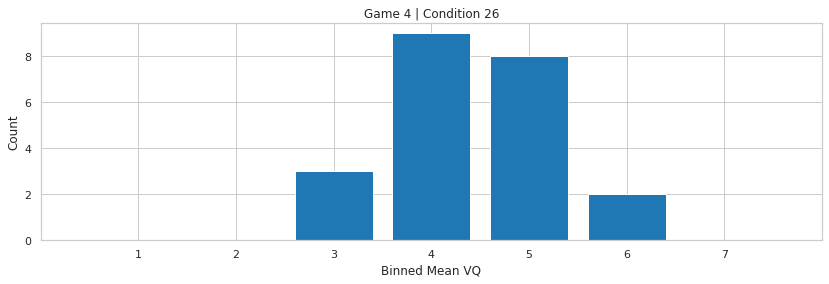

In [3]:
vq_bins = pd.interval_range(0.5, 7.5, freq=1)
vq_bin_assignment = pd.cut(sheet.VQ, vq_bins)
binned_vq = sheet.VQ.groupby(vq_bin_assignment)

vq_hist_by_cond = binned_vq.count()
vq_hist_by_cond

fig, ax = plt.subplots(figsize=FIG_SIZE)

x = vq_hist_by_cond.index.categories.mid

ax.bar(x, vq_hist_by_cond.values)
ax.set_xticks(range(1, 8))
ax.set_xlim([0, 8])
ax.set_title(f"Game 4 | Condition 26")
ax.set_xlabel("Binned Mean VQ")
ax.set_ylabel("Count")

None

## Normalising

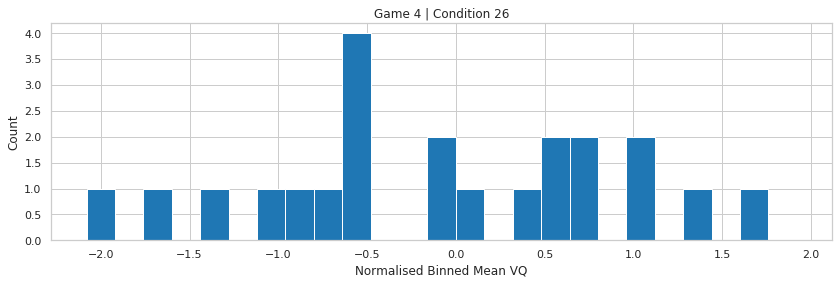

In [4]:
vq_norm = sheet.VQ
vq_norm = vq_norm - vq_norm.mean()
vq_norm /= vq_norm.std()

bins = pd.interval_range(-2, 2, periods=25)
vq_bin_assignment = pd.cut(vq_norm, bins)
binned_vq = sheet.VQ.groupby(vq_bin_assignment)

vq_hist_by_cond = binned_vq.count()
vq_hist_by_cond

fig, ax = plt.subplots(figsize=FIG_SIZE)

x_left = vq_hist_by_cond.index.categories.left
x_width = vq_hist_by_cond.index.categories.length

ax.bar(x_left, vq_hist_by_cond.values, width=x_width)
ax.set_title(f"Game 4 | Condition 26")
ax.set_xlabel("Normalised Binned Mean VQ")
ax.set_ylabel("Count")

None

## Statistical Tests

In [5]:
ks = scipy.stats.kstest(vq_norm, "norm")
sw = scipy.stats.shapiro(vq_norm)

print(f"Kolmogrov-Smirnov-Test significance: {ks[1]} -> is normal: {ks[1] >= 0.05}")
print(f"Shapiro-Wilk-Test significance: {sw[1]} -> is normal: {sw[1] >= 0.05}")

Kolmogrov-Smirnov-Test significance: 0.7935271767683817 -> is normal: True
Shapiro-Wilk-Test significance: 0.8708953857421875 -> is normal: True


## Q-Q Plot

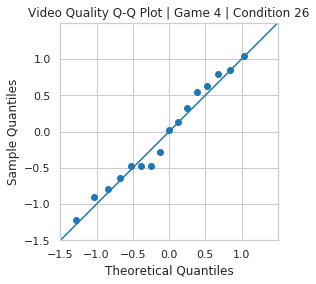

In [6]:
quantiles = np.arange(0.1, 0.9, 0.05)
theoretical = scipy.stats.norm.ppf(quantiles)
sampled = vq_norm.quantile(quantiles)

fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.plot([-2, 2], [-2, 2])
ax.scatter(theoretical, sampled)
ax.set_title("Video Quality Q-Q Plot | Game 4 | Condition 26")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")
ax.set_aspect("equal")
ticks = np.arange(-1.5, 1.5, 0.5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
None